In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [54]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

In [55]:
import cv2
import pathlib

In [56]:
from sklearn import metrics
import PIL

In [57]:
from google.colab import drive

In [58]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
url="/content/drive/MyDrive/skin cancer/data/train"

In [60]:
url=pathlib.Path(url)

In [61]:
data={"benign":list(url.glob("benign/*")),
      "malignant":list(url.glob("malignant/*"))}

In [62]:
len(data["benign"])

1440

In [63]:
len(data["malignant"])

1197

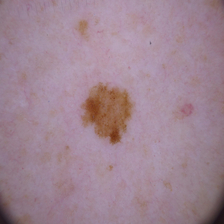

In [64]:
PIL.Image.open(data["benign"][0])

In [65]:
img=cv2.imread(str(data["benign"][0]))

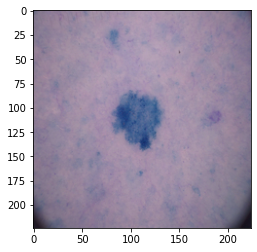

In [66]:
plt.imshow(img)

In [67]:
data_index={"benign":0,
            "malignant":1}

In [68]:
x,y=[],[]
for name,lis in data.items():
  for l in lis:
    img_array=cv2.imread(str(l))
    try:
      img_resize=cv2.resize(img_array,(224,224))
    except:
      continue
    x.append(img_resize)
    y.append(data_index[name])

In [69]:
x=np.array(x)
y=np.array(y)

In [70]:
x=x/255

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [73]:
x_train.shape

(1845, 224, 224, 3)

In [74]:
x_test.shape

(792, 224, 224, 3)

In [75]:
model=keras.Sequential([
      hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5",trainable=False,input_shape=(224,224,3)),
      keras.layers.Dense(1,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="BinaryCrossentropy",
    metrics=["accuracy"]
)
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
58/58 [==============================] - 15s 183ms/step - loss: 0.6040 - accuracy: 0.6687
Epoch 2/20
58/58 [==============================] - 11s 183ms/step - loss: 0.4430 - accuracy: 0.7903
Epoch 3/20
58/58 [==============================] - 11s 184ms/step - loss: 0.3713 - accuracy: 0.8409
Epoch 4/20
58/58 [==============================] - 11s 186ms/step - loss: 0.3679 - accuracy: 0.8357
Epoch 5/20
58/58 [==============================] - 11s 185ms/step - loss: 0.3363 - accuracy: 0.8571
Epoch 6/20
58/58 [==============================] - 11s 186ms/step - loss: 0.3176 - accuracy: 0.8609
Epoch 7/20
58/58 [==============================] - 11s 185ms/step - loss: 0.3007 - accuracy: 0.8682
Epoch 8/20
58/58 [==============================] - 11s 185ms/step - loss: 0.2842 - accuracy: 0.8833
Epoch 9/20
58/58 [==============================] - 11s 185ms/step - loss: 0.2856 - accuracy: 0.8797
Epoch 10/20
58/58 [==============================] - 11s 185ms/step - loss: 0.2704 - accura

In [76]:
model.evaluate(x_test,y_test)

25/25 [==============================] - 5s 183ms/step - loss: 0.3906 - accuracy: 0.8283


[0.390578955411911, 0.8282828330993652]

In [77]:
y_predict=model.predict(x_test)

In [78]:
y_predict

array([[4.47988421e-01],
       [6.12227261e-01],
       [8.00076425e-01],
       [1.51700253e-04],
       [4.85431440e-02],
       [9.99501348e-01],
       [7.23718286e-01],
       [6.24141395e-01],
       [9.95098293e-01],
       [4.65714723e-01],
       [5.17044961e-01],
       [2.22953796e-01],
       [7.30192661e-01],
       [2.26290330e-01],
       [9.60835934e-01],
       [4.55916412e-02],
       [9.98179913e-01],
       [9.59146082e-01],
       [3.80751141e-03],
       [7.96818912e-01],
       [8.20641279e-01],
       [9.88243937e-01],
       [1.37720615e-01],
       [2.60693461e-01],
       [2.07943723e-01],
       [6.33228123e-01],
       [9.94509935e-01],
       [1.40261662e-03],
       [9.91189003e-01],
       [1.14061600e-02],
       [2.42222124e-03],
       [9.47806299e-01],
       [4.41867650e-01],
       [9.27038670e-01],
       [4.59144354e-01],
       [9.97296035e-01],
       [2.32401490e-03],
       [9.72816348e-01],
       [5.33994241e-03],
       [6.22553676e-02],


In [79]:
y_predicted=[]
for i in y_predict:
  if i[0]<0.5:
    y_predicted.append(0)
  else:
    y_predicted.append(1)

In [80]:
y_test

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [81]:
np.array(y_predicted).shape

(792,)

In [82]:
y_test.shape

(792,)

In [83]:
metrics.accuracy_score(y_test,y_predicted)

0.8282828282828283

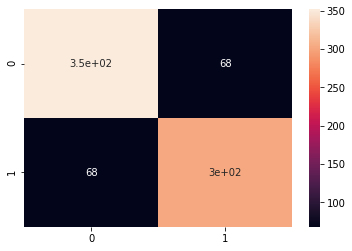

In [84]:
sb.heatmap(metrics.confusion_matrix(y_test,y_predicted),annot=True)

In [85]:
model.save_weights("skin_cancer.h5")

In [86]:
file=open("skin_cancer.json","w")
file.write(model.to_json())
file.close()

In [87]:
from google.colab import files

In [88]:
files.download("/content/skin_cancer.h5")
#files.download("/content/skin_cancer.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>